In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D, Dropout, Embedding
from keras.layers import MaxPooling1D, GlobalAveragePooling1D
import tensorflow as tf
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv


In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['diabetes_prediction_dataset.csv']))

In [6]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
df.diabetes.value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

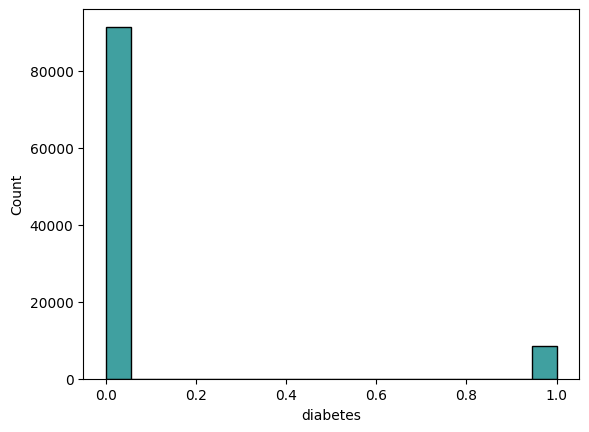

In [20]:
sns.histplot(df['diabetes'], color='teal')
plt.show()

In [91]:
X = df.drop('diabetes',axis=1)
Y = df['diabetes']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size=0.2, random_state=42)

In [80]:
X_train.shape

(80000, 8)

In [11]:
numeric = Pipeline([('scaler', StandardScaler())])
categorical = Pipeline([('encoder', OneHotEncoder())])
preprocessor = ColumnTransformer([('numeric', numeric, ['age','hypertension', 'heart_disease','bmi', 'HbA1c_level','blood_glucose_level']), ('categorical', categorical, ['gender','smoking_history'])])
smt = SMOTE(random_state=42)

# Decision Tree Classifier Model

In [17]:
DTCmodel = Pipeline( [ ('preprocessor', preprocessor), ('smote', smt) , ('classifier', DecisionTreeClassifier(random_state=42)) ] )

In [18]:
DTCmodel

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'hypertension',
                                                   'heart_disease', 'bmi',
                                                   'HbA1c_level',
                                                   'blood_glucose_level']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['gender',
                                                   'smoking_history'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [21]:
DTCmodel.fit(X_train, Y_train)
accuracy = DTCmodel.score(X_test, Y_test)
Y_pred = DTCmodel.predict(X_test)

In [22]:
accuracy

0.9483

In [24]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.68      0.74      0.71      1708

    accuracy                           0.95     20000
   macro avg       0.83      0.86      0.84     20000
weighted avg       0.95      0.95      0.95     20000



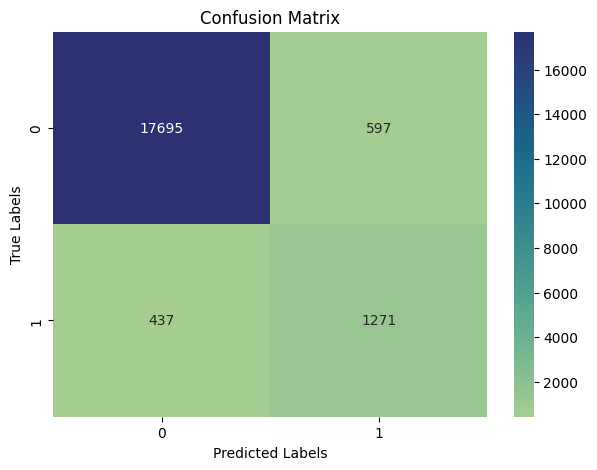

In [38]:
plt.figure(figsize=(7,5))
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, cmap='crest', annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

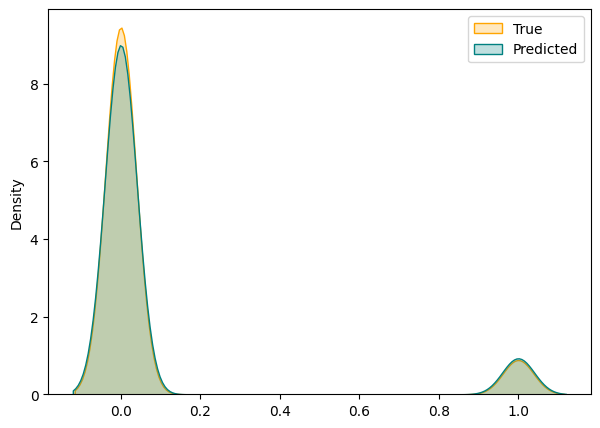

In [161]:
fig, ax = plt.subplots(ncols=1,figsize=(7,5))
sns.kdeplot(Y_test, ax=ax, color='orange',fill=True)
sns.kdeplot(Y_pred, ax=ax, color='teal',fill=True)
plt.legend( labels=['True', 'Predicted'])
plt.show()

In [165]:
print(accuracy_score(Y_test, Y_pred))

0.9483


# CNN Model

In [83]:
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75220,Male,73.0,0,0,former,24.77,3.5,80
48955,Male,80.0,0,0,never,24.60,5.7,145
44966,Female,38.0,0,0,ever,24.33,4.0,158
13568,Female,26.0,0,0,not current,18.87,5.0,100
92727,Female,61.0,1,0,current,22.11,4.5,85


In [84]:
label_encoder = preprocessing.LabelEncoder()

In [92]:
X_train['gender'] = label_encoder.fit_transform(X_train['gender'])

In [109]:
X_test['gender'] = label_encoder.fit_transform(X_test['gender'])

In [93]:
X_train['smoking_history'] = label_encoder.fit_transform(X_train['smoking_history'])

In [110]:
X_test['smoking_history'] = label_encoder.fit_transform(X_test['smoking_history'])

In [94]:
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75220,1,73.0,0,0,3,24.77,3.5,80
48955,1,80.0,0,0,4,24.60,5.7,145
44966,0,38.0,0,0,2,24.33,4.0,158
13568,0,26.0,0,0,5,18.87,5.0,100
92727,0,61.0,1,0,1,22.11,4.5,85


In [96]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 75220 to 15795
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               80000 non-null  int64  
 1   age                  80000 non-null  float64
 2   hypertension         80000 non-null  int64  
 3   heart_disease        80000 non-null  int64  
 4   smoking_history      80000 non-null  int64  
 5   bmi                  80000 non-null  float64
 6   HbA1c_level          80000 non-null  float64
 7   blood_glucose_level  80000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 5.5 MB


In [97]:
X_train = tf.cast(X_train , dtype=tf.float32)

In [111]:
X_test = tf.cast(X_test , dtype=tf.float32)

In [130]:
X_test

<tf.Tensor: shape=(20000, 8), dtype=float32, numpy=
array([[  0.  ,  13.  ,   0.  , ...,  20.82,   5.8 , 126.  ],
       [  0.  ,   3.  ,   0.  , ...,  21.  ,   5.  , 145.  ],
       [  1.  ,  63.  ,   0.  , ...,  25.32,   3.5 , 200.  ],
       ...,
       [  0.  ,  49.  ,   0.  , ...,  26.51,   4.8 , 100.  ],
       [  1.  ,  73.  ,   0.  , ...,  27.32,   6.6 , 100.  ],
       [  0.  ,  43.  ,   0.  , ...,  23.86,   5.8 , 145.  ]],
      dtype=float32)>

In [117]:
X_train

<tf.Tensor: shape=(80000, 8), dtype=float32, numpy=
array([[  1.  ,  73.  ,   0.  , ...,  24.77,   3.5 ,  80.  ],
       [  1.  ,  80.  ,   0.  , ...,  24.6 ,   5.7 , 145.  ],
       [  0.  ,  38.  ,   0.  , ...,  24.33,   4.  , 158.  ],
       ...,
       [  1.  ,  42.  ,   0.  , ...,  26.14,   5.8 ,  85.  ],
       [  0.  ,  37.  ,   0.  , ...,  24.96,   6.2 , 158.  ],
       [  0.  ,  23.  ,   0.  , ...,  27.99,   5.  , 159.  ]],
      dtype=float32)>

In [99]:
Y_train = tf.cast(Y_train, dtype=tf.float32)

In [112]:
Y_test = tf.cast(Y_test, dtype=tf.float32)

In [118]:
Y_train

<tf.Tensor: shape=(80000,), dtype=float32, numpy=array([0., 1., 0., ..., 0., 0., 0.], dtype=float32)>

In [134]:
X_train, Y_train = smt.fit_resample(X_train,Y_train)

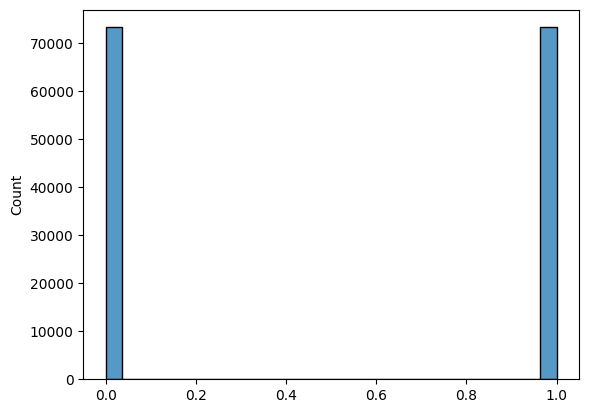

In [156]:
sns.histplot(Y_train)
plt.show()

In [144]:
model = Sequential()
model.add(Dense(16, input_dim=8, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 16)                144       
                                                                 
 dropout_27 (Dropout)        (None, 16)                0         
                                                                 
 dense_22 (Dense)            (None, 8)                 136       
                                                                 
 dropout_28 (Dropout)        (None, 8)                 0         
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [145]:
hist = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test),batch_size=10)

Epoch 1/10
14642/14642 [==============================] - 36s 2ms/step - loss: 0.4646 - accuracy: 0.7732 - val_loss: 0.1929 - val_accuracy: 0.9154
Epoch 2/10
14642/14642 [==============================] - 33s 2ms/step - loss: 0.3643 - accuracy: 0.8453 - val_loss: 0.2920 - val_accuracy: 0.8542
Epoch 3/10
14642/14642 [==============================] - 33s 2ms/step - loss: 0.3515 - accuracy: 0.8505 - val_loss: 0.2462 - val_accuracy: 0.9122
Epoch 4/10
14642/14642 [==============================] - 33s 2ms/step - loss: 0.3423 - accuracy: 0.8566 - val_loss: 0.1926 - val_accuracy: 0.9410
Epoch 5/10
14642/14642 [==============================] - 31s 2ms/step - loss: 0.3382 - accuracy: 0.8601 - val_loss: 0.3868 - val_accuracy: 0.7693
Epoch 6/10
14642/14642 [==============================] - 33s 2ms/step - loss: 0.3353 - accuracy: 0.8617 - val_loss: 0.1698 - val_accuracy: 0.9503
Epoch 7/10
14642/14642 [==============================] - 32s 2ms/step - loss: 0.3295 - accuracy: 0.8646 - val_loss: 0

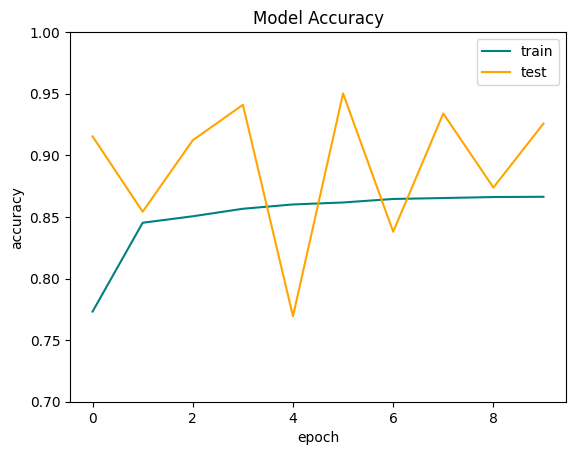

In [154]:
plt.plot(hist.history['accuracy'], 'teal')
plt.plot(hist.history['val_accuracy'], 'orange')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.7,1)
plt.legend(['train', 'test'])
plt.show()

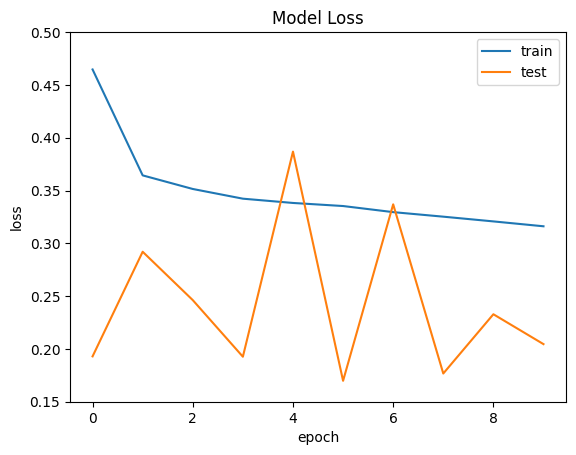

In [153]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0.15,0.5)
plt.legend(['train', 'test'])
plt.show()

In [158]:
preds = np.round(model.predict(X_test)).astype(int)
print(classification_report(Y_test, preds))

625/625 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96     18292
         1.0       0.54      0.82      0.65      1708

    accuracy                           0.93     20000
   macro avg       0.76      0.88      0.81     20000
weighted avg       0.94      0.93      0.93     20000



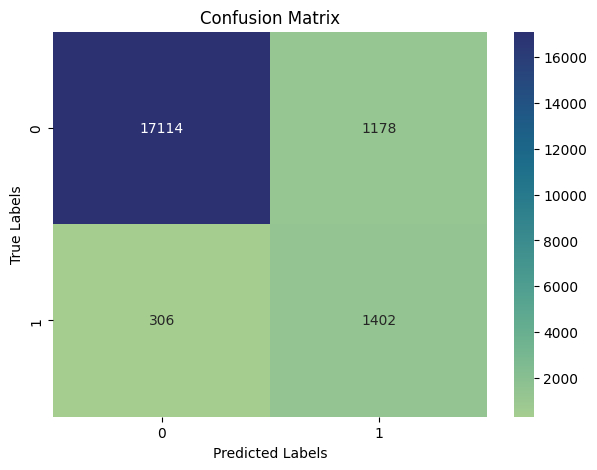

In [159]:
plt.figure(figsize=(7,5))
cm = confusion_matrix(Y_test, preds)
sns.heatmap(cm, cmap='crest', annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

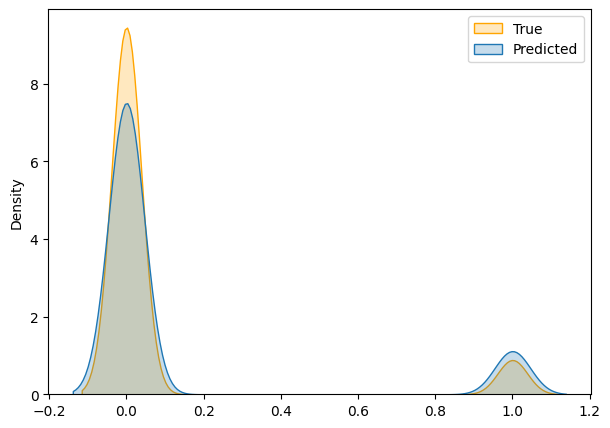

In [162]:
fig, ax = plt.subplots(ncols=1,figsize=(7,5))
sns.kdeplot(Y_test.numpy(), ax=ax, color='orange',fill=True)
sns.kdeplot(preds, ax=ax, color='teal',fill=True)
plt.legend(labels=['True', 'Predicted'])
plt.show()

In [164]:
print(accuracy_score(Y_test.numpy(),preds))

0.9258
